In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import matplotlib.pyplot as plt
import matplotlib as mpl

import warnings
warnings.filterwarnings("ignore")

In [2]:
#读取数据
path = r'.\cs-training.csv'
data = pd.read_csv(path)
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
data.shape

(150000, 12)

In [4]:
#数据集基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [5]:
#样本不平衡
data['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [6]:
#缺失值所占比例
data.isnull().sum()/data.shape[0]

Unnamed: 0                              0.000000
SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.198207
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.026160
dtype: float64

In [8]:
#使用均值和中位数进行缺失值填充
data['MonthlyIncome'].fillna(data['MonthlyIncome'].mean(),inplace=True)
data['NumberOfDependents'].fillna(data['NumberOfDependents'].median(),inplace=True)

In [9]:
x= data.iloc[:,2:]
y = data['SeriousDlqin2yrs']
x.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
print(x_train.shape)
print(y_test.shape)

(105000, 10)
(45000,)


# 默认参数

In [17]:
base_rf = RandomForestClassifier(oob_score = True, random_state=42,class_weight='balanced')
base_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=True,
                       random_state=42, verbose=0, warm_start=False)

In [19]:
y_train_hat = base_rf.predict(x_train)
y_hat = base_rf.predict(x_test)

print('train accuracy_score:', metrics.accuracy_score(y_train,y_train_hat))
print('test accuracy_score:', metrics.accuracy_score(y_test,y_hat))
print('train auc_sorce:', metrics.roc_auc_score(y_train,y_train_hat))
print('test auc_sorce:', metrics.roc_auc_score(y_test,y_hat))
print('Out of Bag:',base_rf.oob_score_)

train accuracy_score: 0.989895238095238
test accuracy_score: 0.9332222222222222
train auc_sorce: 0.9279690208360867
test auc_sorce: 0.5671441310529624
Out of Bag: 0.9273142857142858


# n_estimators调参

In [20]:
param = range(1,211,10)
parameters ={'n_estimators':param}
gs_rf = GridSearchCV(estimator=RandomForestClassifier(oob_score = True, random_state=42,class_weight='balanced'), 
                     param_grid=parameters, n_jobs=-1, cv=5, scoring='roc_auc' )
gs_rf.fit(x_train,y_train)


print('best_params:', gs_rf.best_params_, gs_rf.best_score_)


best_params: {'n_estimators': 201} 0.8399044877761138


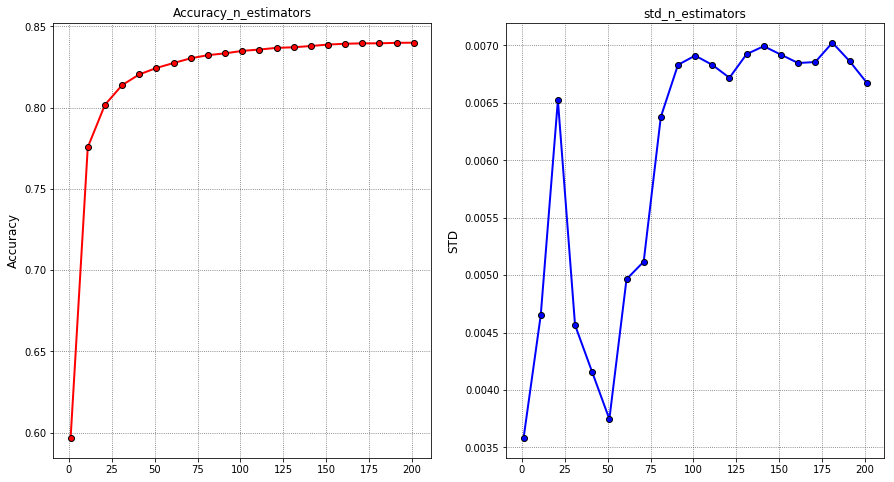

In [21]:
mean_list = gs_rf.cv_results_['mean_test_score']
std_list = gs_rf.cv_results_['std_test_score']

plt.figure(figsize = (23,8),facecolor='w')

plt.subplot(1, 3, 1)
plt.plot(param, mean_list, 'ro-', markeredgecolor='k', lw=2)  
plt.ylabel('Accuracy',fontsize=12)
plt.title('Accuracy_n_estimators')
plt.grid(b=True, ls=':', color='#606060')

plt.subplot(1, 3, 2)
plt.plot(param, std_list, 'bo-', markeredgecolor='k', lw=2)  
plt.ylabel('STD',fontsize=12)
plt.title('std_n_estimators')
plt.grid(b=True, ls=':', color='#606060')

# criterion调参

In [25]:
param = ['gini','entropy']
parameters ={'criterion':param}

gs_rf = GridSearchCV(estimator=RandomForestClassifier(n_estimators = 120,oob_score = True, random_state=42,class_weight='balanced'), 
                     param_grid=parameters, n_jobs=-1, cv=5, scoring='roc_auc' )
gs_rf.fit(x_train,y_train)

print('best_params:', gs_rf.best_params_, gs_rf.best_score_)

best_params: {'criterion': 'entropy'} 0.8392437278642209


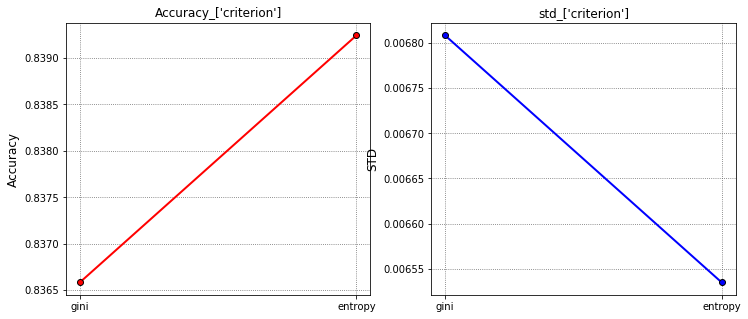

In [26]:
mean_list = gs_rf.cv_results_['mean_test_score']
std_list = gs_rf.cv_results_['std_test_score']

plt.figure(figsize = (12,5),facecolor='w')

plt.subplot(1, 2, 1)
plt.plot(param, mean_list, 'ro-', markeredgecolor='k', lw=2)  
plt.ylabel('Accuracy',fontsize=12)
plt.title('Accuracy_%s'%list(parameters.keys()))
plt.grid(b=True, ls=':', color='#606060')

plt.subplot(1, 2, 2)
plt.plot(param, std_list, 'bo-', markeredgecolor='k', lw=2)  
plt.ylabel('STD',fontsize=12)
plt.title('std_%s'%list(parameters.keys()))
plt.grid(b=True, ls=':', color='#606060')

# max_features调参

In [28]:
param = range(1,10,1)
parameters ={'max_features':param}

gs_rf = GridSearchCV(
    estimator=RandomForestClassifier(n_estimators = 120,criterion = 'entropy',oob_score = True,class_weight='balanced', random_state=42), 
                     param_grid=parameters, n_jobs=-1, cv=5, scoring='roc_auc' )
gs_rf.fit(x_train,y_train)

print('best_params:', gs_rf.best_params_, gs_rf.best_score_)

best_params: {'max_features': 2} 0.8412551154272842


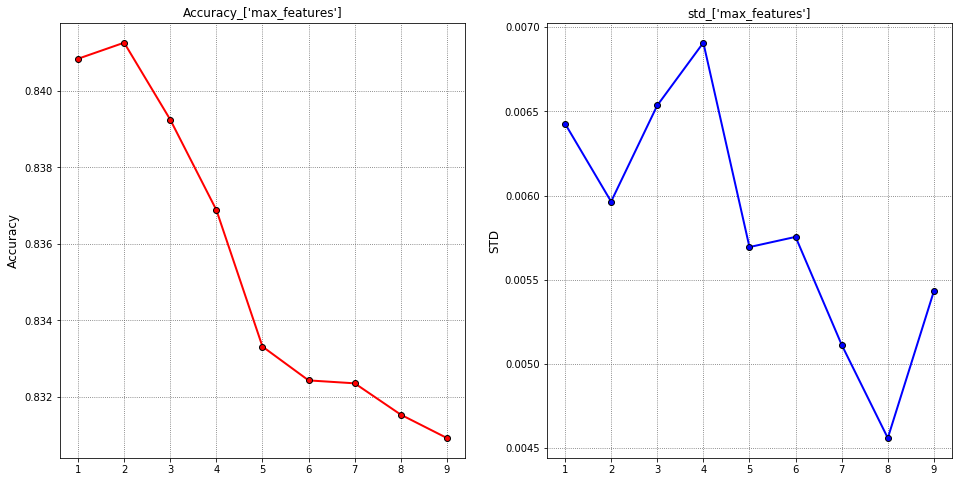

In [29]:
mean_list = gs_rf.cv_results_['mean_test_score']
std_list = gs_rf.cv_results_['std_test_score']

plt.figure(figsize = (16,8),facecolor='w')

plt.subplot(1, 2, 1)
plt.plot(param, mean_list, 'ro-', markeredgecolor='k', lw=2)  
plt.ylabel('Accuracy',fontsize=12)
plt.title('Accuracy_%s'%list(parameters.keys()))
plt.grid(b=True, ls=':', color='#606060')

plt.subplot(1, 2, 2)
plt.plot(param, std_list, 'bo-', markeredgecolor='k', lw=2)  
plt.ylabel('STD',fontsize=12)
plt.title('std_%s'%list(parameters.keys()))
plt.grid(b=True, ls=':', color='#606060')

# max_depth调参

In [30]:
param = np.arange(1,110,10)
parameters ={'max_depth':param}

gs_rf = GridSearchCV(estimator=RandomForestClassifier(
    n_estimators = 120,criterion = 'entropy',max_features=2 ,oob_score = True,class_weight='balanced', random_state=42),
                     param_grid=parameters, n_jobs=-1, cv=5, scoring='roc_auc' )
gs_rf.fit(x_train,y_train)

print('best_params:', gs_rf.best_params_, gs_rf.best_score_)

best_params: {'max_depth': 11} 0.8585041009019656


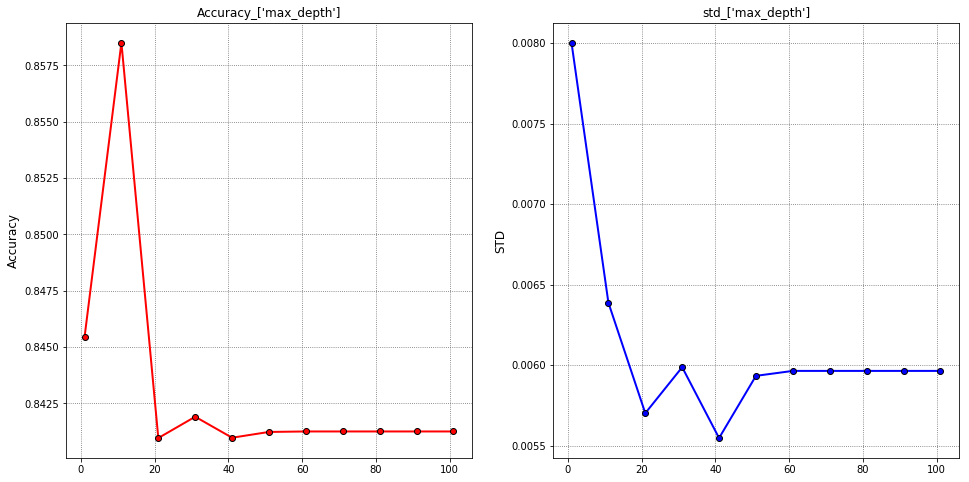

In [32]:
mean_list = gs_rf.cv_results_['mean_test_score']
std_list = gs_rf.cv_results_['std_test_score']

plt.figure(figsize = (16,8),facecolor='w')

plt.subplot(1, 2, 1)
plt.plot(param, mean_list, 'ro-', markeredgecolor='k', lw=2)  
plt.ylabel('Accuracy',fontsize=12)
plt.title('Accuracy_%s'%list(parameters.keys()))
plt.grid(b=True, ls=':', color='#606060')

plt.subplot(1, 2, 2)
plt.plot(param, std_list, 'bo-', markeredgecolor='k', lw=2)  
plt.ylabel('STD',fontsize=12)
plt.title('std_%s'%list(parameters.keys()))
plt.grid(b=True, ls=':', color='#606060')

In [33]:
param = np.arange(1,22,2)
parameters ={'max_depth':param}

gs_rf = GridSearchCV(estimator=RandomForestClassifier(
    n_estimators = 100,criterion = 'entropy',max_features=2 ,oob_score = True,class_weight='balanced', random_state=42),
                     param_grid=parameters, n_jobs=-1, cv=5, scoring='roc_auc' )
gs_rf.fit(x_train,y_train)

print('best_params:', gs_rf.best_params_, gs_rf.best_score_)

best_params: {'max_depth': 7} 0.8630168913863462


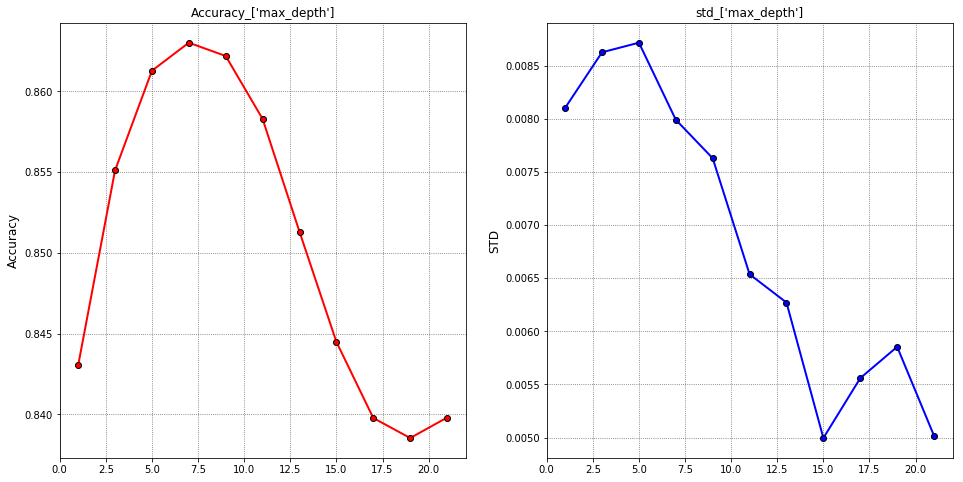

In [34]:
mean_list = gs_rf.cv_results_['mean_test_score']
std_list = gs_rf.cv_results_['std_test_score']

plt.figure(figsize = (16,8),facecolor='w')

plt.subplot(1, 2, 1)
plt.plot(param, mean_list, 'ro-', markeredgecolor='k', lw=2)  
plt.ylabel('Accuracy',fontsize=12)
plt.title('Accuracy_%s'%list(parameters.keys()))
plt.grid(b=True, ls=':', color='#606060')

plt.subplot(1, 2, 2)
plt.plot(param, std_list, 'bo-', markeredgecolor='k', lw=2)  
plt.ylabel('STD',fontsize=12)
plt.title('std_%s'%list(parameters.keys()))
plt.grid(b=True, ls=':', color='#606060')

# min_samples_split调参

In [43]:
param = range(2,22,2)
parameters ={'min_samples_split':param}

gs_rf = GridSearchCV(estimator=RandomForestClassifier(
    n_estimators = 120,criterion = 'entropy',max_features =2 ,max_depth = 7,oob_score = True,class_weight='balanced', random_state=42), 
                     param_grid=parameters, n_jobs=-1, cv=5, scoring='roc_auc' )
gs_rf.fit(x_train,y_train)

print('best_params:', gs_rf.best_params_, gs_rf.best_score_)

best_params: {'min_samples_split': 18} 0.8633261665455141


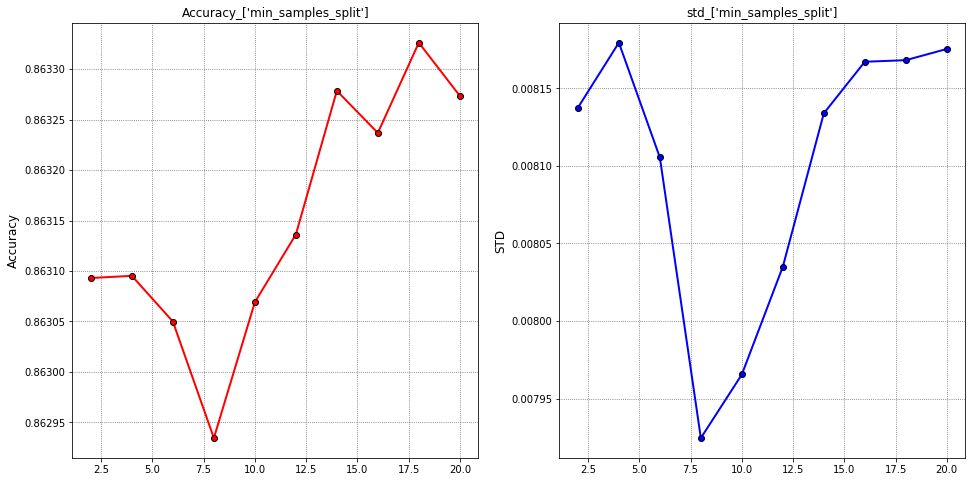

In [44]:
mean_list = gs_rf.cv_results_['mean_test_score']
std_list = gs_rf.cv_results_['std_test_score']

plt.figure(figsize = (16,8),facecolor='w')

plt.subplot(1, 2, 1)
plt.plot(param, mean_list, 'ro-', markeredgecolor='k', lw=2)  
plt.ylabel('Accuracy',fontsize=12)
plt.title('Accuracy_%s'%list(parameters.keys()))
plt.grid(b=True, ls=':', color='#606060')

plt.subplot(1, 2, 2)
plt.plot(param, std_list, 'bo-', markeredgecolor='k', lw=2)  
plt.ylabel('STD',fontsize=12)
plt.title('std_%s'%list(parameters.keys()))
plt.grid(b=True, ls=':', color='#606060')

# min_samples_leaf调参

In [45]:
param = range(2,22,2)
parameters ={'min_samples_leaf':param}

gs_rf = GridSearchCV(estimator=RandomForestClassifier(n_estimators = 120,criterion = 'entropy',max_features = 2,max_depth =7,
                        min_samples_split=18,oob_score = True,class_weight='balanced', random_state=42), 
                     param_grid=parameters, n_jobs=-1, cv=5, scoring='roc_auc' )
gs_rf.fit(x_train,y_train)

print('best_params:', gs_rf.best_params_, gs_rf.best_score_)

best_params: {'min_samples_leaf': 16} 0.8637423392340567


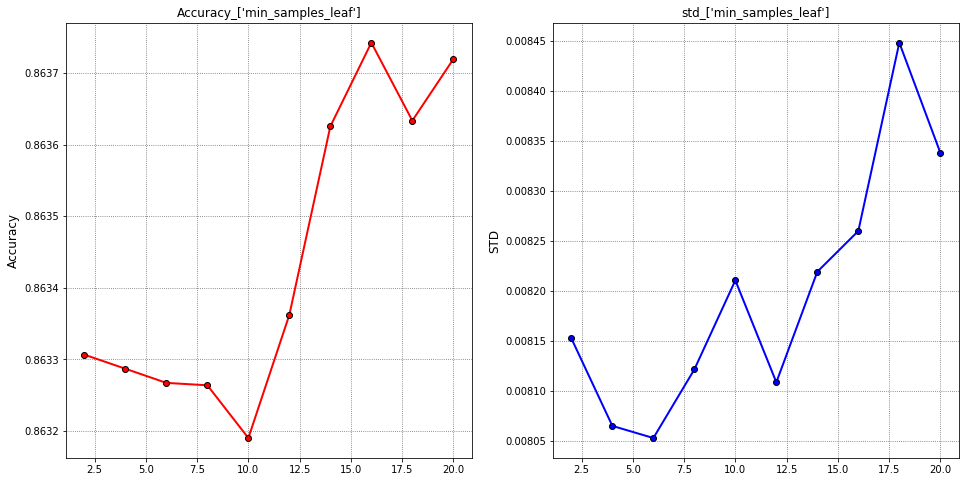

In [46]:
mean_list = gs_rf.cv_results_['mean_test_score']
std_list = gs_rf.cv_results_['std_test_score']

plt.figure(figsize = (16,8),facecolor='w')

plt.subplot(1, 2, 1)
plt.plot(param, mean_list, 'ro-', markeredgecolor='k', lw=2)  
plt.ylabel('Accuracy',fontsize=12)
plt.title('Accuracy_%s'%list(parameters.keys()))
plt.grid(b=True, ls=':', color='#606060')

plt.subplot(1, 2, 2)
plt.plot(param, std_list, 'bo-', markeredgecolor='k', lw=2)  
plt.ylabel('STD',fontsize=12)
plt.title('std_%s'%list(parameters.keys()))
plt.grid(b=True, ls=':', color='#606060')

# max_leaf_nodes调参

In [48]:
param = range(20,250,30)
parameters ={'max_leaf_nodes':param}

gs_rf = GridSearchCV(
    estimator=RandomForestClassifier(n_estimators = 120,criterion = 'entropy',max_features =2 ,max_depth =7 ,min_samples_split=18 ,
                                     min_samples_leaf=16 ,oob_score = True,class_weight='balanced', random_state=42), 
                     param_grid=parameters, n_jobs=-1, cv=5, scoring='roc_auc' )
gs_rf.fit(x_train,y_train)

print('best_params:', gs_rf.best_params_, gs_rf.best_score_)

best_params: {'max_leaf_nodes': 80} 0.8637082477636315


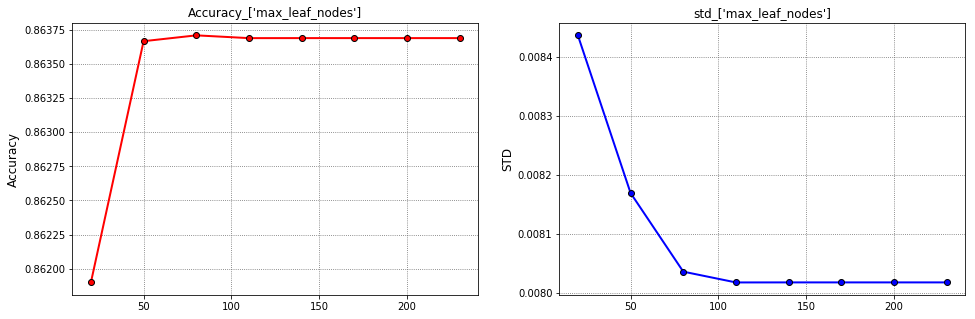

In [55]:
mean_list = gs_rf.cv_results_['mean_test_score']
std_list = gs_rf.cv_results_['std_test_score']

plt.figure(figsize = (16,5),facecolor='w')

plt.subplot(1, 2, 1)
plt.plot(param, mean_list, 'ro-', markeredgecolor='k', lw=2)  
plt.ylabel('Accuracy',fontsize=12)
plt.title('Accuracy_%s'%list(parameters.keys()))
plt.grid(b=True, ls=':', color='#606060')

plt.subplot(1, 2, 2)
plt.plot(param, std_list, 'bo-', markeredgecolor='k', lw=2)  
plt.ylabel('STD',fontsize=12)
plt.title('std_%s'%list(parameters.keys()))
plt.grid(b=True, ls=':', color='#606060')

In [58]:
rf = RandomForestClassifier(n_estimators = 120,criterion = 'entropy',max_features =2, max_depth =7,
                    min_samples_split=18, min_samples_leaf=16,max_leaf_nodes=80,oob_score = True,class_weight='balanced', random_state=42)
rf.fit(x_train,y_train)
y_hat = rf.predict(x)

y_train_hat = rf.predict(x_train)
y_hat = rf.predict(x_test)

print('train accuracy_score:', metrics.accuracy_score(y_train,y_train_hat))
print('test accuracy_score:', metrics.accuracy_score(y_test,y_hat))
print('train auc_sorce:', metrics.roc_auc_score(y_train,y_train_hat))
print('test auc_sorce:', metrics.roc_auc_score(y_test,y_hat))
print('Out of Bag:',rf.oob_score_)

train accuracy_score: 0.8021428571428572
test accuracy_score: 0.799
train auc_sorce: 0.7939878905180079
test auc_sorce: 0.778220475170432
Out of Bag: 0.7993333333333333


In [65]:
#特征重要性
important_features = pd.DataFrame({'feature':x_train.columns,'importance':rf.feature_importances_})
important_features.sort_values(by = 'importance',ascending = False,inplace =True)
important_features['cum_importance'] = np.cumsum(important_features['importance'])
# sel_features = important_features[important_features['importance']<0.95].feature
# sel_features
important_features

,feature,importance,cum_importance
0,RevolvingUtilizationOfUnsecuredLines,0.339598,0.339598
6,NumberOfTimes90DaysLate,0.208159,0.547757
2,NumberOfTime30-59DaysPastDueNotWorse,0.194705,0.742462
8,NumberOfTime60-89DaysPastDueNotWorse,0.133041,0.875503
1,age,0.045763,0.921266
5,NumberOfOpenCreditLinesAndLoans,0.022038,0.943304
3,DebtRatio,0.020242,0.963545
4,MonthlyIncome,0.017194,0.980739
7,NumberRealEstateLoansOrLines,0.012759,0.993498
9,NumberOfDependents,0.006502,1.000000
